In [ ]:
import pandas as pd

file_path = "/content/Udemy Courses - January 2024.xlsx"

df = pd.read_excel(file_path)

df.head()




,course_id: A unique identifier for each course.
0,course_title: The title of the course.
1,url: URL of the course on Udemy.
2,is_paid: Indicates whether the course is paid ...
3,price: The price of the course (if it's a paid...
4,num_subscribers: The number of subscribers for...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('course_id: A unique identifier for each course.').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd

file_path = "/content/Udemy Courses - January 2024.xlsx"
df = pd.read_excel(file_path, sheet_name="Onyx Data -DataDNA Dataset Chal")

df.head()


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-7-a774f4d5aef7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')


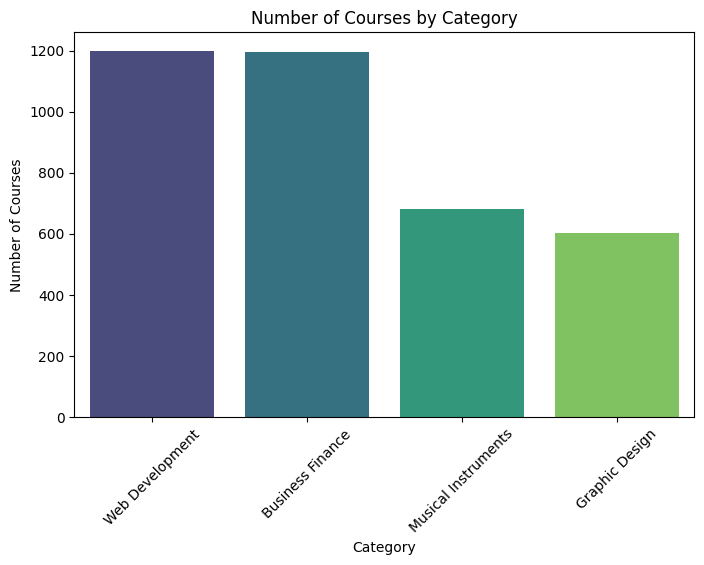

In [ ]:
# حساب عدد الدورات لكل مجال
subject_counts = df['subject'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')
plt.title("Number of Courses by Category")
plt.xlabel("Category")
plt.ylabel("Number of Courses")
plt.xticks(rotation=45)
plt.show()


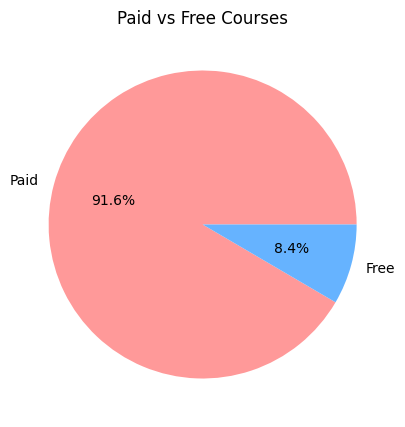

In [ ]:
# حساب عدد الدورات المجانية والمدفوعة
paid_free_counts = df['is_paid'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(paid_free_counts, labels=['Paid', 'Free'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Paid vs Free Courses")
plt.show()

<ipython-input-11-8994e5b7d06f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subscribers_avg.index, y=subscribers_avg.values, palette=['#ff9999', '#66b3ff'])


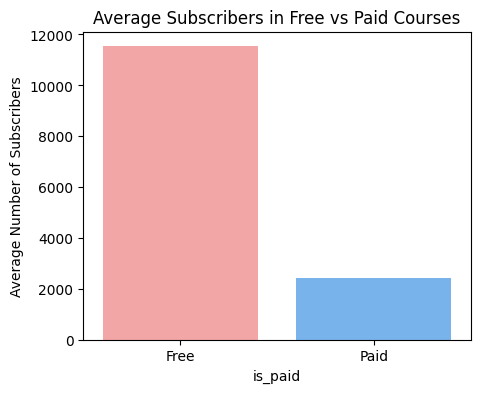

In [ ]:
# حساب متوسط عدد المشتركين لكل نوع
subscribers_avg = df.groupby('is_paid')['num_subscribers'].mean()

plt.figure(figsize=(5,4))
sns.barplot(x=subscribers_avg.index, y=subscribers_avg.values, palette=['#ff9999', '#66b3ff'])
plt.xticks(ticks=[0,1], labels=['Free', 'Paid'])
plt.title("Average Subscribers in Free vs Paid Courses")
plt.ylabel("Average Number of Subscribers")
plt.show()


<ipython-input-12-f939fc045ed1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_subject.index, y=avg_price_per_subject.values, palette='coolwarm')


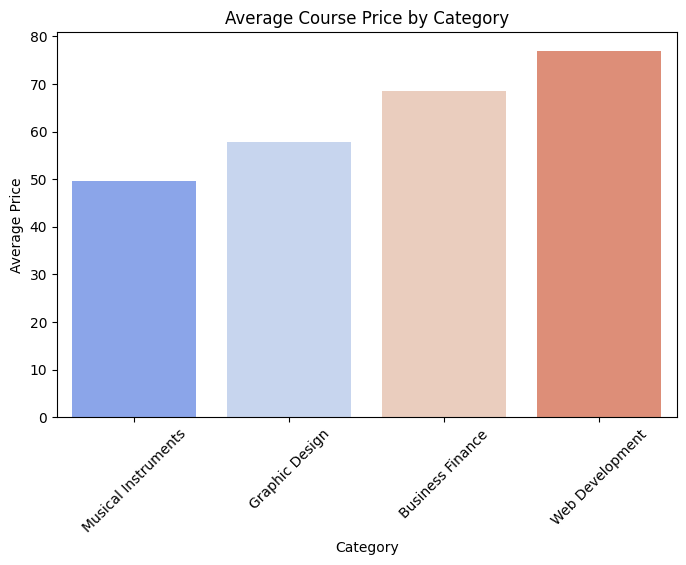

In [ ]:
# حساب متوسط السعر لكل مجال
avg_price_per_subject = df.groupby('subject')['price'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_per_subject.index, y=avg_price_per_subject.values, palette='coolwarm')
plt.title("Average Course Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-22473d5ef1bb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_courses['course_title'], x=top_courses['num_subscribers'], palette='magma')


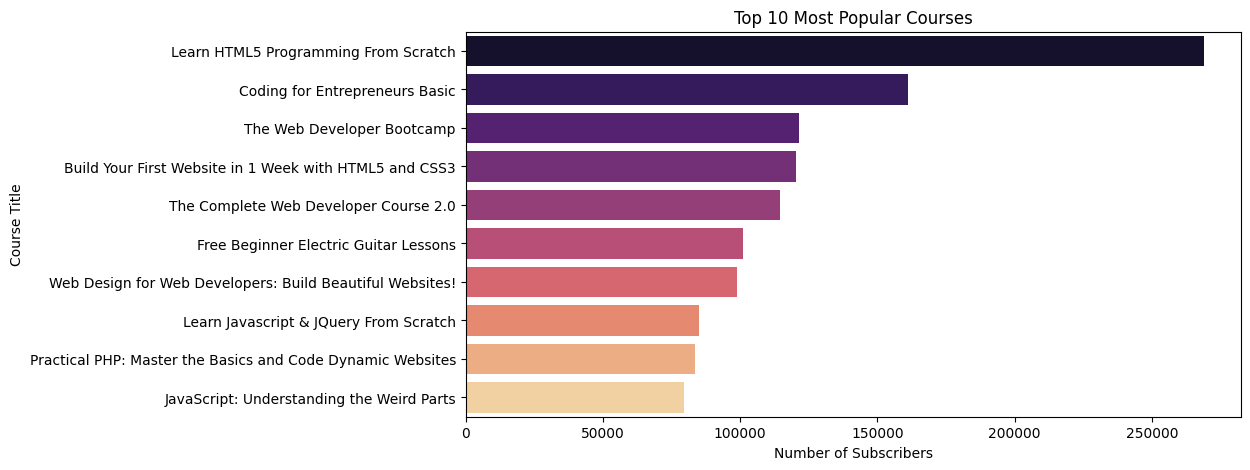

In [ ]:
# استخراج أعلى 10 دورات من حيث عدد المشتركين
top_courses = df.nlargest(10, 'num_subscribers')

plt.figure(figsize=(10,5))
sns.barplot(y=top_courses['course_title'], x=top_courses['num_subscribers'], palette='magma')
plt.xlabel("Number of Subscribers")
plt.ylabel("Course Title")
plt.title("Top 10 Most Popular Courses")
plt.show()


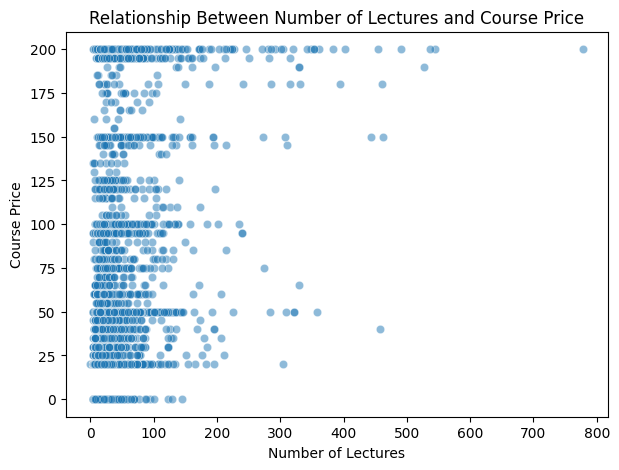

In [ ]:
#  مخطط الانتشار
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['num_lectures'], y=df['price'], alpha=0.5)
plt.xlabel("Number of Lectures")
plt.ylabel("Course Price")
plt.title("Relationship Between Number of Lectures and Course Price")
plt.show()

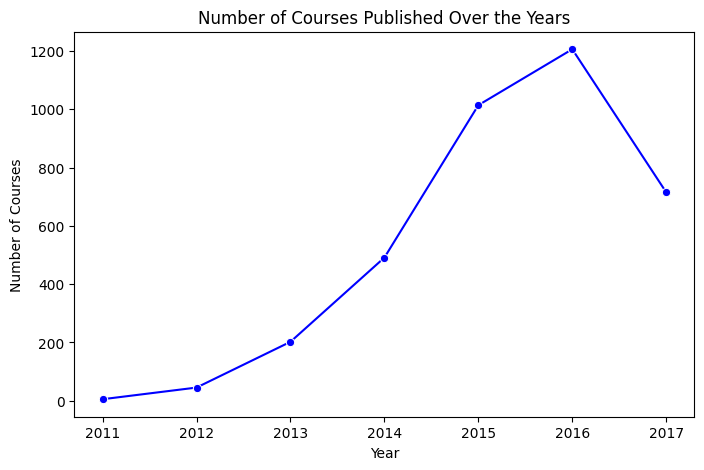

In [ ]:
# تحويل تاريخ النشر إلى سنة
df['published_year'] = pd.to_datetime(df['published_timestamp']).dt.year

# حساب عدد الدورات المنشورة سنوياً
courses_per_year = df['published_year'].value_counts().sort_index()

#  المخطط الخطي
plt.figure(figsize=(8,5))
sns.lineplot(x=courses_per_year.index, y=courses_per_year.values, marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Number of Courses")
plt.title("Number of Courses Published Over the Years")
plt.show()

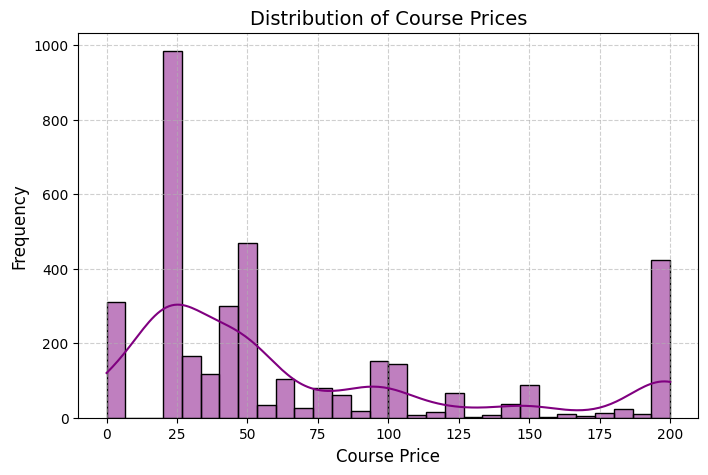

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True, color='purple')

plt.title("Distribution of Course Prices", fontsize=14)
plt.xlabel("Course Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<ipython-input-17-9e36fd30d253>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subject', y='price', data=df, palette='coolwarm')


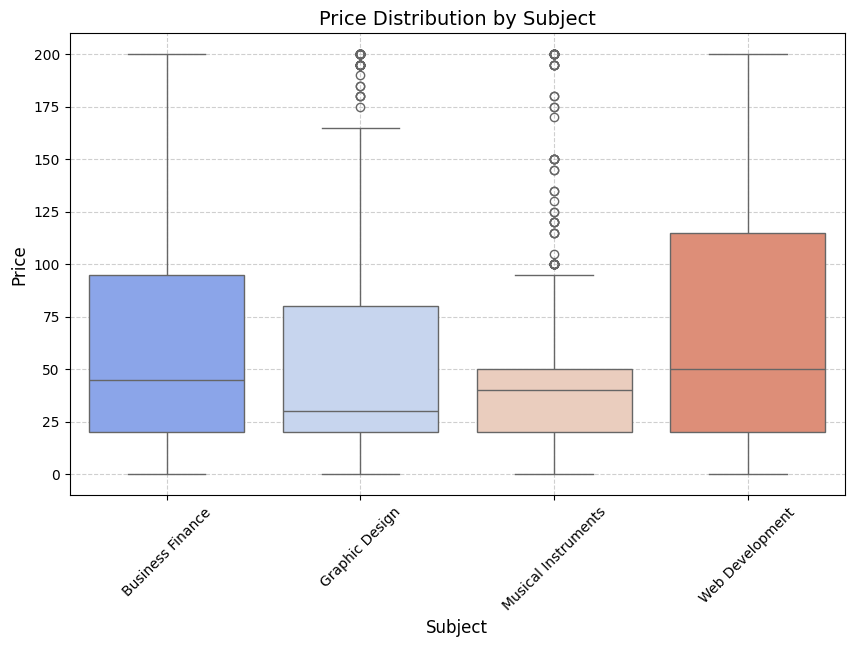

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='subject', y='price', data=df, palette='coolwarm')

plt.title("Price Distribution by Subject", fontsize=14)
plt.xlabel("Subject", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


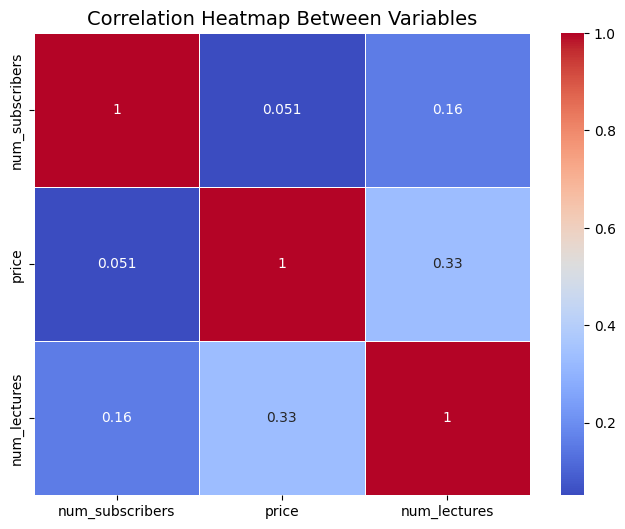

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['num_subscribers', 'price', 'num_lectures']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap Between Variables", fontsize=14)
plt.show()


In [33]:
!jupyter nbconvert --to html "/content/Udemy.ipynb"


[NbConvertApp] Converting notebook /content/Udemy.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 867192 bytes to /content/Udemy.html
